# Data Gathering

In [1]:
import pandas as pd
import requests
import json
import datetime
import matplotlib.pyplot as plt

In [2]:
# Reading data from provided twitter-archive-enhanced.csv file
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# checking the dataframe after reading
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Fetching data from image_predictions.tsv hosted on udacity server
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
# writing content to image-predictions.tsv
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)

In [6]:
# reading image-predictions.tsv into image_preds dataframe
image_preds = pd.read_csv('image-predictions.tsv', sep="\t")

In [7]:
# checking the dataframe after reading from tsv
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
Fetching data using Twitter API
import tweepy
# removed keys/secrets/tokens for project submission
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
# Fetching data using Twitter API for each twitter id in twitter-archive-enhanced.csv and writing it to 'tweet_json.txt'
tweet_ids = list(tweet_arch_df.tweet_id.unique())
counter = 0
failed_ids = []
total = len(tweet_ids)
for tweet_id in tweet_ids:
    counter = counter+1
    print("Processing ", counter, " of ", total, " tweet_id: ", tweet_id)
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweet_json = tweet._json
        with open('tweet_json.txt','+a') as outfile:
            json.dump(tweet_json, outfile)
            outfile.write("\n")
        
    except Exception as e:
        failed_ids.append(tweet_id)
        print("Error fetching data: ", tweet_id," : ", str(e))    

In [10]:
#  reading each line of 'tweet_json.txt' for tweet_id, retweets_count, favourite_count
tweet_detail_list=[]

with open('tweet_json.txt', 'r') as file:
    for line in file:
        line = json.loads(line.rstrip('\n'))
        tweet_detail_list.append({'tweet_id':line.get('id'),
        'retweets_count':line.get('retweet_count'),
        'favourite_count':line.get('favorite_count')})

# creating a dataframe
details = pd.DataFrame(tweet_detail_list)

In [11]:
# checking dataframe 
details.head()

,favourite_count,retweets_count,tweet_id
0,38211,8371,892420643555336193
1,32760,6180,892177421306343426
2,24666,4091,891815181378084864
3,41542,8507,891689557279858688
4,39727,9213,891327558926688256


In [12]:
# Now we have 3 Dataframes - archive, image_preds and details

# Assessing data

In [13]:
# Checking archive dataframe for missing data, column datatypes etc
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Total number of records = 2356. timestamp is a string. There are many null entries for columns - retweeted_status_id,  retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, expanded_urls                                           

In [14]:
# Analyzing values of rating_denominator
archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

#### Some rating_denominator are very large (>20)

In [15]:
# Analyzing values of rating_numerator
archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

#### Some rating_numerator are very large (>20)

In [16]:
# Analyzing records where rating_numerator == "17"
archive.query('rating_numerator == "17"').text.unique()

array(['@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s'],
      dtype=object)

#### It a retweet which needs to be removed

In [17]:
# Analyzing tweets which have rating_numerator > 20, to know the reason behind high ratingss
archive.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


#### tweet_id 810984652412424192 has some wrong data. # Googled for some high rated tweets, found they give even more than 10 ratings. Group of dogs are also given high ratings depending on number of dogs in the group.


In [18]:
# Analyzing tweet_id = 810984652412424192
archive.query('tweet_id == 810984652412424192').text.values

array(['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'],
      dtype=object)

#### tweet_id 810984652412424192 does not contain rating, so can be removed from dataframe. Other ratings with ratings 0 or more than 20 need to verified and corrected.

In [19]:
# Checking if multiple stages exist for same dog

def get_multi_stage_str(row):
    ret = ""
    if row.get("doggo")!="None":
        if ret:
            ret = ret +"|"+ row.get("doggo")
        else:
            ret = row.get("doggo")
    if row.get("floofer")!="None":
        if ret:
            ret = ret +"|"+ row.get("floofer")
        else:
            ret = row.get("floofer")
    if row.get("pupper")!="None":
        if ret:
            ret = ret +"|"+ row.get("pupper")
        else:
            ret = row.get("pupper")
    if row.get("puppo")!="None":
        if ret:
            ret = ret +"|"+ row.get("puppo")
        else:
            ret = row.get("puppo")
    if not ret:
        ret = "None"
    return ret

archive.apply(get_multi_stage_str, axis=1).value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo|pupper       12
floofer             9
doggo|floofer       1
doggo|puppo         1
dtype: int64

#### There are few records with multiple stages, and for many records there is no dog stage. We can have a single column for dog stage. 

In [20]:
# Checking for max min values
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### archive: rating_numerator and rating_denominator has wrong max and min values

In [21]:
# Analyzing image_preds for missing values and data types of columns
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### image_preds: Total number of record = 2075. All records have non null values.

In [22]:
# Understanding image_preds data 
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
# Analyzing duplicate records
image_preds.tweet_id.duplicated().sum()

0

#### image_preds : None of the tweet_id's are duplicated

In [24]:
image_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### image_preds: No abnormal max, min values observed.

In [25]:
# Analyzing for missing values and data types of columns
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 3 columns):
favourite_count    2347 non-null int64
retweets_count     2347 non-null int64
tweet_id           2347 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


#### details: Total number of record = 2347. All records have non null values.

In [26]:
# Understanding details data 
details.head()

,favourite_count,retweets_count,tweet_id
0,38211,8371,892420643555336193
1,32760,6180,892177421306343426
2,24666,4091,891815181378084864
3,41542,8507,891689557279858688
4,39727,9213,891327558926688256


In [27]:
# Analyzing duplicate records
details.tweet_id.duplicated().sum()

5

#### details : There are 5 duplicate entries in details dataframe

In [28]:
# Checking for common columns in archive, details and image_preds dataframes
all_columns = pd.Series(list(archive) + list(details) + list(image_preds))
all_columns[all_columns.duplicated()]

19    tweet_id
20    tweet_id
dtype: object

#### archive, details and image_preds dataframes : No columns duplicated except tweet_id, which is fine and will be used to merge dataframes

In [29]:
# Checking for max min values
details.describe()

,favourite_count,retweets_count,tweet_id
count,2347.000000,2347.000000,2.347000e+03
mean,8058.376651,2959.670643,7.425400e+17
std,12436.443294,4961.551142,6.859934e+16
min,0.000000,0.000000,6.660209e+17
25%,1384.500000,594.000000,6.783846e+17
50%,3491.000000,1386.000000,7.189719e+17
75%,9869.500000,3446.500000,7.989298e+17
max,164928.000000,84082.000000,8.924206e+17


#### details: No abnormal max, min values observed.

### Data Issues

#### Quality

##### `archive` table
- There is retweets data along with original tweets
- We needs records with date < August 1st 2017
- 810984652412424192 is not a dog being rated
- Some rating_numerator are not correct
- Some rating_denominator are not correct
- 1776 is an anomaly rating
- Calculate rating based on rating_numerator and rating_denominator
- Delete unwanted columns

##### `image__pred` table
- Some names for p1,p2,p3 are lowercase and some have underscore present
- Delete unwanted columns

##### `details` table
- Remove duplicate records

#### Tidiness

- One column for dog stages
- All tables should be part of one dataset

# Cleaning Data

In [30]:
# creating copy of dataframe
archive_clean = archive.copy()
details_clean = details.copy()
image_pred_clean = image_preds.copy()

#### archive: There is retweets data along with original tweets

#### Define

Remove the rows corresponding to retweeted records by removing the rows where In_reply_to_status_id or In_reply_to_user_id or Retweeted_status_id or Retweeted_status_user_id or Retweeted_status_timestamp is not NaN

#### Code

In [31]:
# Fetching records where in_reply_to_status_id, in_reply_to_user_id and retweeted_status_id and retweeted_status_user_id are null
archive_clean = archive_clean[pd.isnull(archive_clean['in_reply_to_status_id']) & pd.isnull(archive_clean['in_reply_to_user_id']) 
                              & pd.isnull(archive_clean['retweeted_status_id']) & pd.isnull(archive_clean['retweeted_status_user_id'])]

#### Test

In [32]:
archive_clean[(archive_clean.in_reply_to_status_id.notnull()) | (archive_clean.in_reply_to_user_id.notnull()) | (archive_clean.retweeted_status_id.notnull()) | (archive_clean.retweeted_status_user_id.notnull())].index

Int64Index([], dtype='int64')

In [33]:
# Checking number of records in archive_clean
archive_clean.shape[0]

2097

#### archive: We need records with date < August 1st 2017 

#### Define
Convert date to date format then take only records with date < August 1st 2017 

#### Code

In [34]:
# converting date to datetime format
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

thresh_date = datetime.datetime(2017, 7, 31)
archive_clean = archive_clean[archive_clean['timestamp'] <= thresh_date]

#### Test

In [35]:
# checking records with timestamp > thresh_date
archive_clean[archive_clean['timestamp'] > thresh_date]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### archive: 810984652412424192 is not a dog being rated

#### Define
Remove the records with tweet_id 810984652412424192

#### Code

In [36]:
# Dropping index of tweet_id 810984652412424192
archive_clean.drop(archive_clean.query('tweet_id == "810984652412424192"').index, inplace=True)

#### Test

In [37]:
# checking record with tweet_id = "810984652412424192"
archive_clean.query('tweet_id == 810984652412424192')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### archive: Some rating_numerator are not correct

#### Define
Correct the rating_numerator by verifying the values with text column.

#### Code

In [38]:
# Checking the available values of rating_numerator
archive_clean.rating_numerator.unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   75,   27,
          3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,   80,
         45,   60,   44,  121,   26,    2,  144,   88,    1,  420],
      dtype=int64)

In [39]:
#Checking the rating_numerator for rating_numerator < 5 or rating_numerator > 27
df = archive_clean.query('rating_numerator < 5 or rating_numerator > 27')[['tweet_id','rating_numerator','text']]

for reco in df.to_dict('records'):
    print(str(reco.get("tweet_id"))+"  "+reco.get("text")+"  "+str(reco.get("rating_numerator")))


835152434251116546  When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag  0
820690176645140481  The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd  84
786709082849828864  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS  75
777885040357281792  This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M  3
760252756032651264  This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP  4
758467244762497024  Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE  165
757596066325864448  Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmn

In [40]:
# After visual verification below are the correct values and corresponding tweet_id
# 786709082849828864 - Correct rating_numerator = 9.75 
# 716439118184652801 - Correct rating_numerator = 11
# 695064344191721472 - Correct rating_numerator = 13
# 722974582966214656 - Correct rating_numerator = 13
# 666287406224695296 - Correct rating_numerator  = 9

In [41]:
# Changing rating_numerator type int to float to allow decimals 
archive_clean[['rating_numerator']] = archive_clean[['rating_numerator']].astype(float)

# Updating rating_numerator with correct values

archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 11
archive_clean.loc[(archive_clean.tweet_id == 695064344191721472), 'rating_numerator'] = 13
archive_clean.loc[(archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9

#### Test

In [42]:
# checking records where rating_numerator was incorrect 
archive_clean.query("tweet_id in [786709082849828864, 716439118184652801, 695064344191721472, 722974582966214656, 666287406224695296]")[['tweet_id', 'rating_numerator']]

,tweet_id,rating_numerator
695,786709082849828864,9.75
1165,722974582966214656,13.00
1202,716439118184652801,11.00
1459,695064344191721472,13.00
2335,666287406224695296,9.00


#### archive: Some rating_denominator are not correct

#### Define
Correct the rating_denominator by verifying the values with text column.

#### Code

In [43]:
# Checking the available values of rating_denominator
archive_clean.rating_denominator.unique()

array([ 10,  70, 150,  11, 170,  20,  50,  90,  80,  40, 110, 120,   2],
      dtype=int64)

In [44]:
# Checking the rating_numerator for rating_denominator < 5 or rating_denominator > 27
df = archive_clean.query('rating_denominator < 5 or rating_denominator > 27')[['tweet_id','rating_denominator','text']]
# print(df.to_dict('records'))
for reco in df.to_dict('records'):
    print(str(reco.get("tweet_id"))+"  "+reco.get("text")+"  "+str(reco.get("rating_denominator")))

820690176645140481  The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd  70
758467244762497024  Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE  150
731156023742988288  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv  170
716439118184652801  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq  50
713900603437621249  Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1  90
710658690886586372  Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12  80
709198395643068416  From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK  50
704054845121142784  Here is a whole flock of puppers.  60/50 I'

In [45]:
# After visual verification below are the correct values and corresponding tweet_id
# 716439118184652801 - correct rating_denominator = 10
# 666287406224695296 - correct rating_denominator = 10

# Change rating_denominator type int to float to allow decimals 
archive_clean[['rating_denominator']] = archive_clean[['rating_denominator']].astype(float)

# Updating rating_denominator

archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

#### Test

In [46]:
# checking records where rating_numerator was incorrect
archive_clean.query("tweet_id in [716439118184652801, 666287406224695296]")[['tweet_id', 'rating_denominator']]

,tweet_id,rating_denominator
1202,716439118184652801,10.0
2335,666287406224695296,10.0


#### archive: 1776 is an anomaly rating

#### Define
Remove the record with rating 1776

#### Code

In [47]:
# dropping record with rating_numerator = 1776
archive_clean.drop(archive_clean.query('rating_numerator == 1776').index, inplace=True)

#### Test

In [48]:
# checking record with rating_numerator = 1776
archive_clean.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### archive: Calculate rating based on rating_numerator and rating_denominator

#### Define
Create one column rating. Populate it's value using rating = (rating_numerator/rating_denominator)*10

#### Code

In [49]:
# creating new column 'rating' and populating it's value
archive_clean['rating'] = (archive_clean['rating_numerator']/archive_clean['rating_denominator'])*10

#### Test

In [50]:
# chceking values in rating column
archive_clean['rating'].value_counts()

12.000000     489
10.000000     437
11.000000     419
13.000000     286
9.000000      154
8.000000       98
7.000000       51
14.000000      38
5.000000       34
6.000000       32
3.000000       19
4.000000       14
2.000000        9
1.000000        4
6.500000        1
26.000000       1
9.750000        1
27.000000       1
0.000000        1
8.181818        1
420.000000      1
6.363636        1
Name: rating, dtype: int64

#### image__pred: Some names for p1, p2, p3 are lowercase and underscore present in names

#### Define
Convert to camel case and  replace underscore with " "

#### Code

In [51]:
# Checking values of 'p1','p2','p3'
image_pred_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman


In [52]:
# converting 'p1','p2','p3' to camel case and replacing "_" with " "
image_pred_clean['p1'] = image_pred_clean['p1'].apply(lambda x: x.title().replace("_"," "))
image_pred_clean['p2'] = image_pred_clean['p2'].apply(lambda x: x.title().replace("_"," "))
image_pred_clean['p3'] = image_pred_clean['p3'].apply(lambda x: x.title().replace("_"," "))

#### Test

In [53]:
# checking values of 'p1','p2','p3'
image_pred_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman


#### Quality - image_preds: Delete unwanted columns

#### Define
Delete columns not required for analysis

#### Code

In [54]:
# chceking existing columns
image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [55]:
# dropping unwanted columns
image_pred_clean.drop( ['jpg_url', 'img_num','p1_conf','p2_conf','p3_conf'], 1, inplace=True)

#### Test

In [56]:
# chceking columns
image_pred_clean.columns

Index(['tweet_id', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog'], dtype='object')

#### Tidiness - archive: One column for dog stages

#### Define
Create one column dog_stages from columns- 'doggo', 'floofer', 'pupper', 'puppo'

#### Code


In [57]:
# chceking existing columns
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating'],
      dtype='object')

In [58]:
# Reusing get_multi_stage_str function created earlier and creating a new column for dog_stage
archive_clean["dog_stage"] = archive_clean.apply(get_multi_stage_str, axis=1)

#### Test

In [59]:
#chceking values in dog_stage column
archive_clean['dog_stage'].value_counts()

None             1756
pupper            221
doggo              72
puppo              23
floofer             9
doggo|pupper        9
doggo|floofer       1
doggo|puppo         1
Name: dog_stage, dtype: int64

#### Quality - archive: Delete unwanted columns

#### Define
Delete columns not required for analysis

#### Code

In [60]:
# checking existing columns 
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating', 'dog_stage'],
      dtype='object')

In [61]:
# dropping columns
archive_clean.drop( ['in_reply_to_status_id', 'in_reply_to_user_id', 
       'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls','rating_numerator',
       'rating_denominator','doggo', 'floofer', 'pupper', 'puppo'], 
       1, inplace=True)

#### Test

In [62]:
# checking columns 
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'name', 'rating', 'dog_stage'], dtype='object')

#### Quality - details: Remove duplicate records

#### Define
Remove duplicate tweet_id's

#### Code

In [63]:
# Dropping duplicate tweet_id's
details_clean.drop_duplicates(subset='tweet_id', keep='first', inplace=True)

#### Test

In [64]:
# checking for duplicate tweet_id's
details_clean.tweet_id.duplicated().sum()

0

#### Tidiness - All tables should be part of one dataset

#### Define
Merge the 3 dataframes on the basis of tweet_id

#### Code

In [65]:
# Merging archive_clean and details_clean
archive_details = pd.merge(left=archive_clean, right=details_clean, on="tweet_id", how="inner")

In [66]:
# Merging archive_details and image_pred_clean
tweet_df = pd.merge(left=archive_details, right=image_pred_clean, on="tweet_id", how="inner")

#### Test

In [67]:
# Checking number of records in each dataframe
archive_clean.shape[0], details_clean.shape[0], image_pred_clean.shape[0]

(2092, 2342, 2075)

In [68]:
# Checking number of records in archive_details after first merge
archive_details.shape[0]

2091

In [69]:
# checking columns in archive_details
archive_details.columns

Index(['tweet_id', 'timestamp', 'text', 'name', 'rating', 'dog_stage',
       'favourite_count', 'retweets_count'],
      dtype='object')

In [70]:
# Checking number of records in tweet_df
tweet_df.shape[0]

1965

In [71]:
# checking tweet_df merged dataframe
tweet_df.head()

,tweet_id,timestamp,text,name,rating,dog_stage,favourite_count,retweets_count,p1,p1_dog,p2,p2_dog,p3,p3_dog
0,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,13.0,None,41542,8507,Paper Towel,False,Labrador Retriever,True,Spatula,False
1,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,12.0,None,39727,9213,Basset,True,English Springer,True,German Short-Haired Pointer,True
2,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,None,13.0,None,19938,3065,Chesapeake Bay Retriever,True,Irish Terrier,True,Indian Elephant,False
3,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,Jax,13.0,None,11670,2031,Appenzeller,True,Border Collie,True,Ice Lolly,False
4,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,None,13.0,None,64480,18571,Pomeranian,True,Eskimo Dog,True,Pembroke,True


In [72]:
# checking columns
tweet_df.columns # columns are required columns

Index(['tweet_id', 'timestamp', 'text', 'name', 'rating', 'dog_stage',
       'favourite_count', 'retweets_count', 'p1', 'p1_dog', 'p2', 'p2_dog',
       'p3', 'p3_dog'],
      dtype='object')

In [73]:
# checking missing values, column datatypes
tweet_df.info()# All the records have non null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1964
Data columns (total 14 columns):
tweet_id           1965 non-null int64
timestamp          1965 non-null datetime64[ns]
text               1965 non-null object
name               1965 non-null object
rating             1965 non-null float64
dog_stage          1965 non-null object
favourite_count    1965 non-null int64
retweets_count     1965 non-null int64
p1                 1965 non-null object
p1_dog             1965 non-null bool
p2                 1965 non-null object
p2_dog             1965 non-null bool
p3                 1965 non-null object
p3_dog             1965 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 190.0+ KB


### Saving dataframe to twitter_archive_master.csv

In [74]:
# writing dataframe to csv
tweet_df.to_csv("twitter_archive_master.csv", index=False)

### Insight & Visualization 1 - Most common predicted dog type

In [75]:
# creating a column "dog_type", and populating it with predicted dog type
def find_dog_type(row):
    dog_type = None
    if row.get("p1_dog")==True:
        dog_type = row.get("p1")
    elif row.get("p2_dog")==True:
        dog_type = row.get("p2")
    elif row.get("p3_dog")==True:
        dog_type = row.get("p3")
    return dog_type
    
tweet_df["dog_type"] = tweet_df.apply(find_dog_type, axis=1)
tweet_df.dog_type.value_counts().index[0]

'Golden Retriever'

Text(0,0.5,'Dog Type')

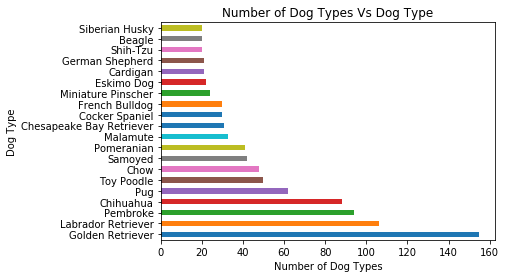

In [76]:
# Plotting Number of Dog Types Vs Dog Type
tweet_df.dog_type.value_counts().head(20).plot(kind="barh")
plt.title("Number of Dog Types Vs Dog Type")
plt.xlabel('Number of Dog Types')
plt.ylabel('Dog Type')

> #### Most common predicted dog type is 'Golden Retriever'

###  Insight & Visualization 2 - Top 10 Highly Rated Dog Types

Text(0,0.5,'Dog Type')

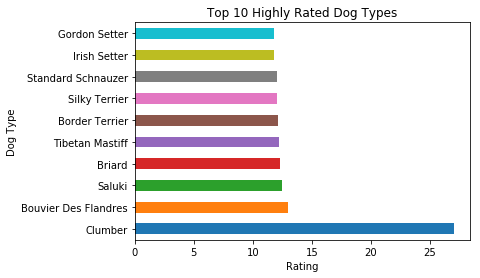

In [77]:
# Plotting Rating Vs Top 10 Highly Rated Dog Types
rating_count = 10
# grouping dataframe by dog_type, then taking mean, sorting 'rating' column, taking top 10 values for plotting horizontal bar chart
tweet_df.groupby("dog_type").mean().sort_values("rating", ascending=False)["rating"].head(rating_count).plot(kind = "barh")
plt.title("Top "+str(rating_count)+" Highly Rated Dog Types")
plt.xlabel('Rating')
plt.ylabel('Dog Type')

> #### Clumber dog type has received highest ratings.

> #### Clumber, Bouvier Des Flandres, Saluki, Briard, Tibetan Mastiff, Border Terrier, Standard Schnauzer, Silky Terrier, Gordon Setter, Irish Setter are top 10 High rated dogs.

###  Insight & Visualization 3 - Relation between rating and favourite_count

Text(0,0.5,'Favourite count')

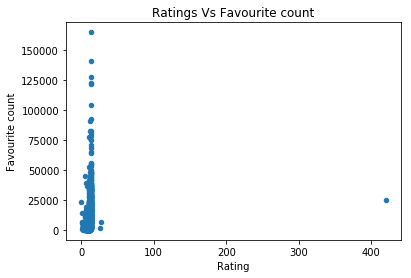

In [78]:
# Plotting Rating Vs Favourite count
tweet_df.plot(kind="scatter", x="rating", y="favourite_count");
plt.title("Ratings Vs Favourite count")
plt.xlabel('Rating')
plt.ylabel('Favourite count')

> #### For analyzing most likely ratings, taking records with rating<17 and plotting again.

Text(0,0.5,'Favourite count')

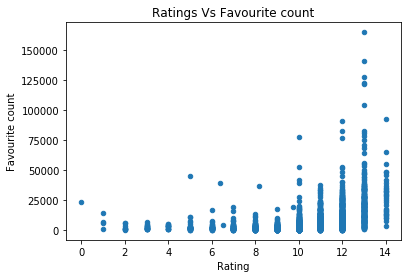

In [79]:
# Plotting Ratings(<17) Vs Favourite count
tweet_df[tweet_df["rating"]<17].plot(kind="scatter", x="rating", y="favourite_count");
plt.title("Ratings Vs Favourite count")
plt.xlabel('Rating')
plt.ylabel('Favourite count')

> #### Although there is not a clear relationship between rating and favourite count, many tweets having rating 13 were favorite of over 100000 people. 

In [80]:
# Checking rating which has highest Favourite count
tweet_df[tweet_df["favourite_count"]==max(tweet_df["favourite_count"])]["rating"]

763    13.0
Name: rating, dtype: float64

> #### 13 rating has the highest favourite count.

###  Insight & Visualization 4 - Rating trend over the years?

Text(0,0.5,'Year-Month')

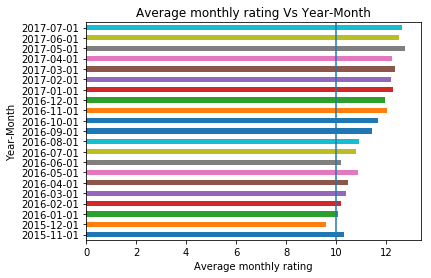

In [81]:
# Plotting Average monthly rating Vs Year-Month

# Creating a column month_year for grouping the dataframe by each month, assuming date = 1 , as calculating monthly ratings, date can be ignored.
tweet_df["month_year"] = tweet_df["timestamp"].apply(lambda t: datetime.date(t.year, t.month, 1))

# calculating monthly average rating anf plotting horizontal bar chart
tweet_df.groupby("month_year")["rating"].mean().plot(kind="barh", x="month_year", y="rating")
plt.axvline(10)
plt.title("Average monthly rating Vs Year-Month")
plt.xlabel('Average monthly rating')
plt.ylabel('Year-Month')

> #### After June 2016, there is a large increase in monthly average rating . 

#### Reference :
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html
- https://docs.python.org/3/library/datetime.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html
- https://stackoverflow.com/questions/28161356/sort-pandas-dataframe-by-date